In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
#from keras import Sequential
#from keras.layers import Dense
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Using TensorFlow backend.


In [2]:
train = pd.read_csv("train.csv")

In [3]:
test = pd.read_csv("test.csv")

In [4]:
submission = pd.read_csv("sample_submission.csv")

In [5]:
train.head(10)

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,05/2012,95,1.0,...,0,0,0,1,0,0,0,0,0,1
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,03/2012,72,1.0,...,0,0,0,0,0,0,0,1,0,1
2,742515242108,Z,Thornton-Davis,3.250,366000,180,2012-01-01,03/2012,49,1.0,...,0,0,0,0,0,0,0,0,0,1
3,601385667462,X,OTHER,4.750,135000,360,2012-02-01,04/2012,46,2.0,...,0,0,0,0,0,1,1,1,1,1
4,273870029961,X,OTHER,4.750,124000,360,2012-02-01,04/2012,80,1.0,...,3,4,5,6,7,8,9,10,11,1
5,769060024464,Y,Browning-Hart,4.375,150000,360,2012-02-01,04/2012,80,1.0,...,0,0,0,0,0,0,0,0,0,1
6,148071614687,X,OTHER,4.000,59000,360,2012-02-01,04/2012,95,1.0,...,0,0,0,0,0,0,0,0,0,1
7,853383953266,Y,Browning-Hart,4.500,319000,300,2012-01-01,03/2012,62,1.0,...,0,0,0,0,0,0,0,0,0,1
8,423590072335,X,Browning-Hart,4.000,520000,360,2012-03-01,05/2012,76,1.0,...,0,1,0,1,0,1,2,0,1,1
9,308990846816,X,OTHER,4.000,214000,360,2012-01-01,03/2012,95,2.0,...,0,0,1,1,1,1,1,2,2,1


In [6]:
train.dtypes

loan_id                       int64
source                       object
financial_institution        object
interest_rate               float64
unpaid_principal_bal          int64
loan_term                     int64
origination_date             object
first_payment_date           object
loan_to_value                 int64
number_of_borrowers         float64
debt_to_income_ratio        float64
borrower_credit_score       float64
loan_purpose                 object
insurance_percent           float64
co-borrower_credit_score    float64
insurance_type              float64
m1                            int64
m2                            int64
m3                            int64
m4                            int64
m5                            int64
m6                            int64
m7                            int64
m8                            int64
m9                            int64
m10                           int64
m11                           int64
m12                         

In [7]:
df = train.drop(["loan_id", "source", "financial_institution", "origination_date", "first_payment_date","loan_purpose"], axis = 1)

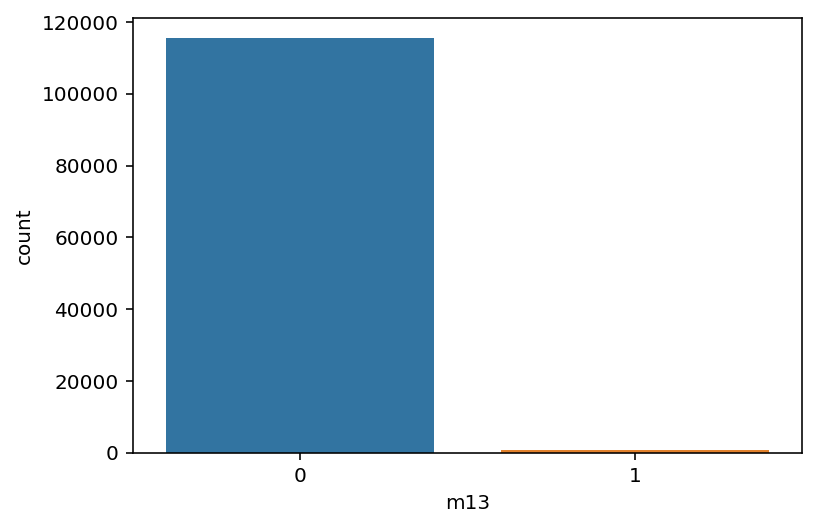

In [8]:
ax = sns.countplot(x="m13", data=df)

In [9]:
X = df.drop(['m13'],axis = 1)
y = df['m13'].values

In [10]:
test_X = test.drop(["loan_id", "source", "financial_institution", "origination_date", "first_payment_date","loan_purpose"], axis = 1)

In [11]:
test_X.head(5)

,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,insurance_type,...,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12
0,3.875,417000,360,75,1,20,790,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4.500,113000,360,80,2,33,793,0,784,0,...,0,0,0,0,0,0,0,0,0,0
2,4.500,72000,360,75,1,34,710,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.125,123000,180,41,2,24,798,0,813,0,...,0,0,0,0,0,0,0,0,0,0
4,3.250,166000,180,53,2,12,767,0,768,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
X.head(4)

,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,insurance_type,...,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12
0,4.250,214000,360,95,1.0,22.0,694.0,30.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
1,4.875,144000,360,72,1.0,44.0,697.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
2,3.250,366000,180,49,1.0,33.0,780.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,4.750,135000,360,46,2.0,44.0,633.0,0.0,638.0,0.0,...,0,0,0,0,0,0,1,1,1,1


In [13]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, RandomizedSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [14]:
#from sklearn.preprocessing import StandardScaler
#normaliser = StandardScaler().fit(X_train.astype(np.float64))
#train_x = normaliser.transform(X_train.astype(np.float64))
#test_x = normaliser.transform(X_test.astype(np.float64))

In [15]:
rclf = RandomForestClassifier()

In [16]:
rclf.fit(X_train,y_train)

C:\Users\manorama\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [17]:
y_pred = rclf.predict(X_test)
print(len(X_test))
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

23212
0.9965104256419094
[[23083    16]
 [   65    48]]


In [18]:
#rf_predict = rclf.predict(test_X)

# Random Search Random Forest

In [19]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [20]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2,
                               random_state=42, n_jobs = -1)

In [21]:
# Fit the random search model
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 19.3min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 95.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 201.9min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [26]:
best_random = rf_random.best_estimator_
rand_pred = best_random.predict(X_test)

In [27]:
best_random

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=90, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=1200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [29]:
print(accuracy_score(y_test,rand_pred))
print(confusion_matrix(y_test,rand_pred))

0.9967258314664829
[[23086    13]
 [   63    50]]


In [30]:
rf_predict = best_random.predict(test_X)

In [31]:
predict = pd.DataFrame(data=rf_predict, columns=["m13"])
seg_pd = pd.DataFrame(data=submission, columns=["loan_id"])
submission = pd.concat([seg_pd, predict], axis=1)
submission
submission.to_csv("submission.csv", index=False)

In [32]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.ravel().shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (92846, 22)
Number transactions y_train dataset:  (92846,)
Number transactions X_test dataset:  (23212, 22)
Number transactions y_test dataset:  (23212,)


In [33]:
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))

Before OverSampling, counts of label '0': 92323 

Before OverSampling, counts of label '1': 523


In [34]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))

After OverSampling, the shape of train_X: (184646, 22)
After OverSampling, the shape of train_y: (184646,) 

After OverSampling, counts of label '0': 92323
After OverSampling, counts of label '1': 92323


In [35]:
sm_rf = RandomForestClassifier()
sm_rf.fit(X_train_res,y_train_res)

C:\Users\manorama\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [38]:
y_pred = sm_rf.predict(X_test)
print(len(X_test))
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

23212
0.9960365328278477
[[23066    33]
 [   59    54]]


In [39]:
sm_rf_predict = sm_rf.predict(test_X)

In [40]:
predict = pd.DataFrame(data=sm_rf_predict, columns=["m13"])
seg_pd = pd.DataFrame(data=submission, columns=["loan_id"])
submission = pd.concat([seg_pd, predict], axis=1)
submission
submission.to_csv("submission.csv", index=False)

In [8]:
np.__version__
pd.__version__
#plt.__version__
sns.__version__

'0.9.0'